In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv("Country_clusters.csv")
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [5]:
# Convert categorical variables to dummy variables
df1 = pd.get_dummies(df)
df1

,Latitude,Longitude,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_UK,Country_USA,Language_English,Language_French,Language_German
0,44.97,-103.77,False,False,False,False,False,True,True,False,False
1,62.40,-96.80,False,True,False,False,False,False,True,False,False
2,46.75,2.40,False,False,True,False,False,False,False,True,False
3,54.01,-2.53,False,False,False,False,True,False,True,False,False
4,51.15,10.40,False,False,False,True,False,False,False,False,True
5,-25.45,133.11,True,False,False,False,False,False,True,False,False


In [6]:
# Show dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    6 non-null      object 
 1   Latitude   6 non-null      float64
 2   Longitude  6 non-null      float64
 3   Language   6 non-null      object 
dtypes: float64(2), object(2)
memory usage: 324.0+ bytes


<Axes: xlabel='Latitude', ylabel='Longitude'>

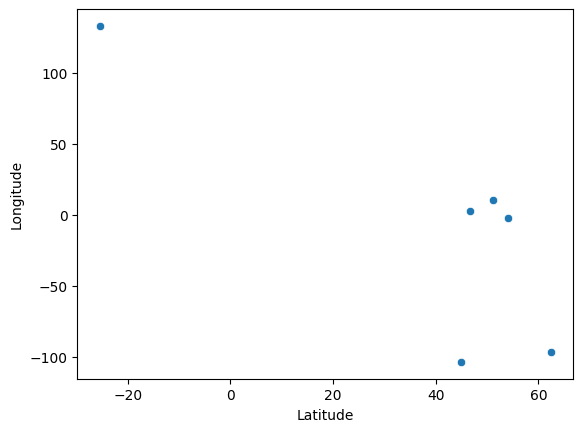

In [7]:
# Scatter plot of Latitude and Longitude
sns.scatterplot(x=df['Latitude'], y=df['Longitude'])

In [9]:
# Scaling Latitude and Longitude for clustering
std_scalar = StandardScaler()
array = std_scalar.fit_transform(df1[['Latitude', 'Longitude']])

x_scaled = pd.DataFrame(array, columns=['Latitude', 'Longitude'])
x_scaled

,Latitude,Longitude
0,0.204344,-1.193114
1,0.798128,-1.104870
2,0.264983,0.151062
3,0.512308,0.088645
4,0.414877,0.252347
5,-2.194639,1.805930


In [10]:
# Scaling Latitude and Longitude for clustering
std_scalar = StandardScaler()
array = std_scalar.fit_transform(df1[['Latitude', 'Longitude']])

x_scaled = pd.DataFrame(array, columns=['Latitude', 'Longitude'])

# Concatenate the scaled columns with the rest of the dataframe
x = pd.concat([x_scaled, df1.drop(['Latitude', 'Longitude'], axis=1)], axis=1)
x

,Latitude,Longitude,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_UK,Country_USA,Language_English,Language_French,Language_German
0,0.204344,-1.193114,False,False,False,False,False,True,True,False,False
1,0.798128,-1.104870,False,True,False,False,False,False,True,False,False
2,0.264983,0.151062,False,False,True,False,False,False,False,True,False
3,0.512308,0.088645,False,False,False,False,True,False,True,False,False
4,0.414877,0.252347,False,False,False,True,False,False,False,False,True
5,-2.194639,1.805930,True,False,False,False,False,False,True,False,False


In [11]:
# KMeans clustering
kmean_model = KMeans(n_clusters=3)
y_pred = kmean_model.fit_predict(x)
y_pred

array([0, 0, 2, 0, 2, 1], dtype=int32)

In [13]:
# Add cluster predictions as a new column
x['Target'] = y_pred
x

,Latitude,Longitude,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_UK,Country_USA,Language_English,Language_French,Language_German,Target
0,0.204344,-1.193114,False,False,False,False,False,True,True,False,False,0
1,0.798128,-1.104870,False,True,False,False,False,False,True,False,False,0
2,0.264983,0.151062,False,False,True,False,False,False,False,True,False,2
3,0.512308,0.088645,False,False,False,False,True,False,True,False,False,0
4,0.414877,0.252347,False,False,False,True,False,False,False,False,True,2
5,-2.194639,1.805930,True,False,False,False,False,False,True,False,False,1


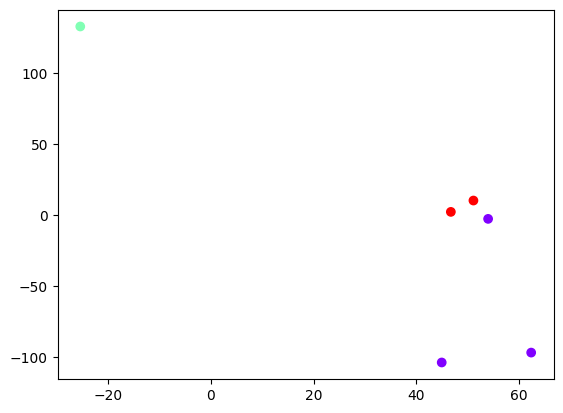

In [14]:
# Plot the clusters
plt.scatter(x=df['Latitude'], y=df['Longitude'], c=y_pred, cmap='rainbow')

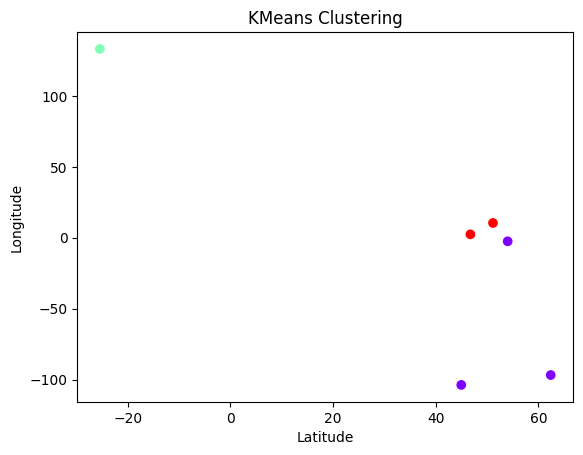

In [15]:
# Plot the clusters
plt.scatter(x=df['Latitude'], y=df['Longitude'], c=y_pred, cmap='rainbow')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('KMeans Clustering')
plt.show()